# 1.  Importing the relevant libraries and data 

Let us first start with the usual importing of relevant libraries which will be required for our analysis. We shall import the data into the dataframe name df

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df_copy=df.copy()

# 2. Data wrangling

Since the raw data could have lots of missing values or other issues, we will be taking care to align the data into simpler more understandable and clear data which will be further helpful to be used in our ML models. Since the columns have not been clearly mentioned as to what they exactly mean, I have made the following assumptions to understand the data better:

* 'ssc_p': 10th Grade percentage
* 'ssc_b':10th Grade board 
* 'hsc_p': 12th Grade percentage 
* 'hsc_b': 12th Grade board 
* 'hsc_s': Higher secondary stream
* 'degree_p': Undergraduate percentage 
* 'degree_t': Undergraduate degree type  
* 'workex': Work experience  
* 'etest_p':Placement test percentage 
* 'specialisation': MBA specialisation 
* 'mba_p': MBA percentage
* 'status': Hiring status 

In [4]:
df['sl_no'].unique().size

215

The data give to us has a total of 215 entries. This is roughly the size of a MBA batch for a particular year of a college. Hence, the data provided could be that for the batch of a particular year.

Let us check the various data types available to us and see if there are any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Salary

As we can clearly see, the only missing values present are in the salary column. This is because the missing values are corresponding to students to did not get placed in the placement program. 

We will make the assumption that the missing values are filled with 0.

In [6]:
df['salary'].fillna(0,inplace=True)
df['salary'].isna().any()

False

In [7]:
df_copy['salary'].median()

265000.0

So, we have replaced all the missing values with the median value of Rs. 2,65,000

## Gender

Gender column is straightforward with either Male (M) or Female (F) indices.
Since we cannot leave the data in object form, let us replace 

**M with 0** and **F with 1** .

In [8]:
df['gender']=df['gender'].map({'M':0,'F':1})

In [9]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## ssc_b and hsc_b

Here, we are presented with the data of the 10th board. Let us check the unique entries and their counts we are presented with.

In [10]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

As we can observe, the unique entries are either Central or others. By Central, the indication must be that the board is CBSE. While others could mean variety of boards such as state board, international board or ICSC board. The candidates with central board is slightly higher as compared to other boards. 

We shall perform the exact same treatment as we did for gender.

**Central : 1
Others : 0**

In [11]:
df['ssc_b']=df['ssc_b'].map({'Central':1,'Others':0})

In [12]:
df['hsc_b']=df['hsc_b'].map({'Central':1,'Others':0})

## hsc_s

This column deals with the specialisation subjects taken by students when they enter 11th grade. Let us see the various entries alongwith their counts.

In [13]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

As can be seen, students with commerce specialisation was highest followed by science and arts.

We shall use one-hot-encoding for this particular feature. This can be done using the pd.get_dummies function.

In [14]:
df_subjects=pd.get_dummies(df['hsc_s'])
df=df.merge(df_subjects,on=df.index)

In [15]:
df.drop('key_0',axis=1,inplace=True)
df.drop('hsc_s',axis=1,inplace=True)

In [16]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'Arts', 'Commerce', 'Science'],
      dtype='object')

In [17]:
df=df[['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts', 'Commerce','Science','degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary']]

## degree_t

Let us check the various types of Undergrad degrees available in the data.

In [18]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

As we can see, most students had their undergraduate degrees in commerce and management followed by science and then others. Just as we did for higher secondary subjects, we shall one hot encode the results of undergrad degrees aswell.

In [19]:
df_deg=pd.get_dummies(df['degree_t'])
df=df.merge(df_deg,on=df.index)

In [20]:
df.drop('key_0',axis=1,inplace=True)
df.drop('degree_t',axis=1,inplace=True)

In [21]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts',
       'Commerce', 'Science', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary', 'Comm&Mgmt', 'Others',
       'Sci&Tech'],
      dtype='object')

In [22]:
df=df[['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'Arts',
       'Commerce', 'Science', 'degree_p','Comm&Mgmt', 'Others',
       'Sci&Tech','workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary']]

In [23]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,0,55.00,0,49.80,0,0,0,1,67.25,0,0,1,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,1,46.00,0,49.20,0,0,1,0,79.00,1,0,0,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,8,0,82.00,1,64.00,1,0,0,1,66.00,0,0,1,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,0,73.00,1,79.00,1,0,1,0,72.00,1,0,0,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,0,58.00,1,70.00,1,0,1,0,61.00,1,0,0,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


## workex

This column tells us if a student has any work experience prior to joining the MBA programme.

We shall map the entries as

**Yes:1
No:0**

In [24]:
df['workex']=df['workex'].map({'Yes':1,'No':0})
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,0,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,0,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,0,96.8,Mkt&Fin,55.50,Placed,425000.0


## specialisation

This column tells us about the type of MBA program the student is currently enrolled in. The value counts for each specialisation are as follows.

In [25]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Hence, majority of the students were in Marketing and Finance while the remaining in Marketing and HR.

We should encode the data as 

**Mkt&Fin : 1
Mkt&HR : 0**

In [26]:
df['specialisation']=df['specialisation'].map({'Mkt&Fin':1,'Mkt&HR':0})

## status

This column tells us whether the student got placed in the placement program. This is our target variable which is important for training and testing purpose in the ML phase.

Let us map the terms placed and unplaced as 

**Placed : 1
Not Placed : 0**

In [27]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [28]:
df['status']=df['status'].map({'Placed':1,'Not Placed':0})

Now, we can consider the data to be cleaned completely off any issues and can be safely used for visualisation and machine learning purposes. Let us take a peek at how the final dataframe looks like.

In [29]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,Arts,Commerce,Science,degree_p,Comm&Mgmt,Others,Sci&Tech,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,0,58.80,1,270000.0
1,2,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,1,66.28,1,200000.0
2,3,0,65.00,1,68.00,1,1,0,0,64.00,1,0,0,0,75.0,1,57.80,1,250000.0
3,4,0,56.00,1,52.00,1,0,0,1,52.00,0,0,1,0,66.0,0,59.43,0,0.0
4,5,0,85.80,1,73.60,1,0,1,0,73.30,1,0,0,0,96.8,1,55.50,1,425000.0


## ssc_p , hsc_p,degree_p, mba_p, etest_p
In order to align the percentage values better,we will be sectioning the percentages into 3 main categories based upon percentage ranges. These ranges are as follows:

0-60 % : 3

61-80 % : 2

81-100 % :1

In [30]:

df.loc[df['ssc_p']<=60,'ssc_p_c']=3
df.loc[(df['ssc_p']>60) & (df['ssc_p']<81),'ssc_p_c']=2
df.loc[(df['ssc_p']>80)& (df['ssc_p']<101),'ssc_p_c']=1

df.loc[df['hsc_p']<=60,'hsc_p_c']=3
df.loc[(df['hsc_p']>60) & (df['hsc_p']<81),'hsc_p_c']=2
df.loc[(df['hsc_p']>80)& (df['hsc_p']<101),'hsc_p_c']=1


df.loc[df['degree_p']<=60,'degree_p_c']=3
df.loc[(df['degree_p']>60) & (df['degree_p']<81),'degree_p_c']=2
df.loc[(df['degree_p']>80)& (df['degree_p']<101),'degree_p_c']=1

df.loc[df['mba_p']<=60,'mba_p_c']=3
df.loc[(df['mba_p']>60) & (df['mba_p']<81),'mba_p_c']=2
df.loc[(df['mba_p']>80)& (df['mba_p']<101),'mba_p_c']=1

df.loc[df['etest_p']<=60,'etest_p_c']=3
df.loc[(df['etest_p']>60) & (df['etest_p']<81),'etest_p_c']=2
df.loc[(df['etest_p']>80)& (df['etest_p']<101),'etest_p_c']=1



qual_type=['ssc_p','hsc_p','degree_p','mba_p','etest_p']

for qual in qual_type:
    df.drop(qual,axis=1,inplace=True)




In [40]:
df.columns

Index(['sl_no', 'gender', 'ssc_b', 'hsc_b', 'Arts', 'Commerce', 'Science',
       'Comm&Mgmt', 'Others', 'Sci&Tech', 'workex', 'specialisation', 'status',
       'salary', 'ssc_p_c', 'hsc_p_c', 'degree_p_c', 'mba_p_c', 'etest_p_c'],
      dtype='object')

In [42]:
df=df[['sl_no', 'gender', 'ssc_b', 'hsc_b','ssc_p_c', 'hsc_p_c', 'degree_p_c', 'mba_p_c', 'etest_p_c', 'Arts', 'Commerce', 'Science',
       'Comm&Mgmt', 'Others', 'Sci&Tech', 'workex', 'specialisation', 'status',
       'salary']]

Now, the dataframe has been wrangled and can be used for the purpose of ML and data visualisation aswell. Let us look at how the dataframe looks like.

In [43]:
df.head()

,sl_no,gender,ssc_b,hsc_b,ssc_p_c,hsc_p_c,degree_p_c,mba_p_c,etest_p_c,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,workex,specialisation,status,salary
0,1,0,0,0,2.0,1.0,3.0,3.0,3.0,0,1,0,0,0,1,0,0,1,270000.0
1,2,0,1,0,2.0,2.0,2.0,2.0,1.0,0,0,1,0,0,1,1,1,1,200000.0
2,3,0,1,1,2.0,2.0,2.0,3.0,2.0,1,0,0,1,0,0,0,1,1,250000.0
3,4,0,1,1,3.0,3.0,3.0,3.0,2.0,0,0,1,0,0,1,0,0,0,0.0
4,5,0,1,1,1.0,2.0,2.0,3.0,1.0,0,1,0,1,0,0,0,1,1,425000.0


# 3. Data Visualisation

In this section, we shall be visualising the various features to understand if they'll have some correlation with the target feature.

## Gender Vs Placed

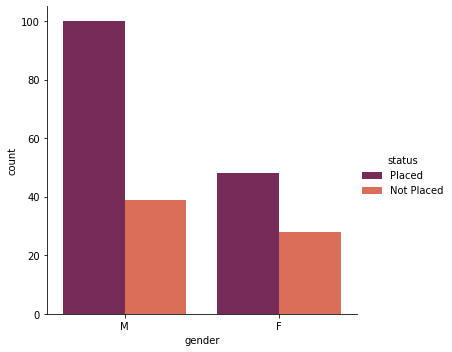

In [115]:
sns.catplot('gender',data=df_copy,kind='count',hue='status',palette='rocket')

As it can be seen, high percentage of male candidates got placed. On the other hand, comparitively lower number of female candidates got placed. This is expected as male candidates are generally higher in most brances. Hence, their chances of getting placed is normally higher as well. Let us check the male to female ratio of this branch.

Text(0.5, 1.0, 'M/F ratio=1.83')

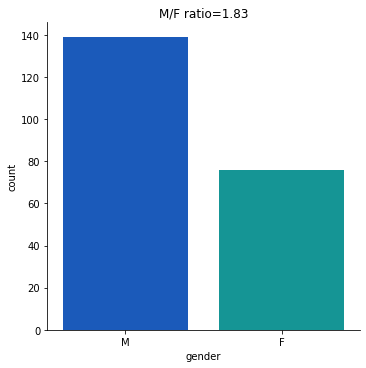

In [33]:
sns.factorplot('gender',data=df_copy,kind='count',palette='winter')
plt.title('M/F ratio={0:.2f}'.format(df_copy['gender'].value_counts()[0]/df_copy['gender'].value_counts()[1]))

The M/F ratio is approximately 2. This can be interpreted as for every 1 female candiate, there are 2 male candiates sitting for placements.


Let us check the placement percentage for each batch to understand if gender does imply better placement conversion.

In [34]:
df_male=df_copy[df_copy['gender']=='M']

In [35]:
df_male['status'].value_counts()

Placed        100
Not Placed     39
Name: status, dtype: int64

In [36]:
male_placed_ratio=df_male['status'].value_counts()[0]/df_male['status'].value_counts()[1]

In [37]:
print('Placement ratio of male candidates:{0:.2f}'.format(male_placed_ratio))

Placement ratio of male candidates:2.56


In [38]:
df_female=df_copy[df_copy['gender']=='F']
df_female['status'].value_counts()

Placed        48
Not Placed    28
Name: status, dtype: int64

In [39]:
female_placed_ratio=df_female['status'].value_counts()[0]/df_female['status'].value_counts()[1]
print('Placement ratio of female candidates:{0:.2f}'.format(female_placed_ratio))

Placement ratio of female candidates:1.71


Here it can be seen from the placement ratios of the two genders that **males outperformed the female candidates in the batch**.

## Scores Vs Placed

Let us see what is the correlation between 10th percentage of each category and placement status

Text(0.5, 6.79999999999999, '10th percentage class')

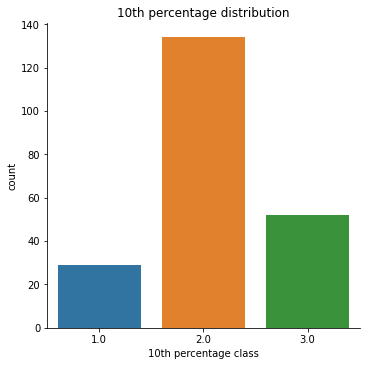

In [116]:
sns.catplot('ssc_p_c',data=df,kind='count')
plt.title('10th percentage distribution')
plt.xlabel('10th percentage class')

As we can see, maximum students fall in the range of 61-80 % followed by 0-50% and then 80-100%. Let us see how the placement status changes with the percentage range.

Text(0.5, 20.80000000000002, '10th Percentage class')

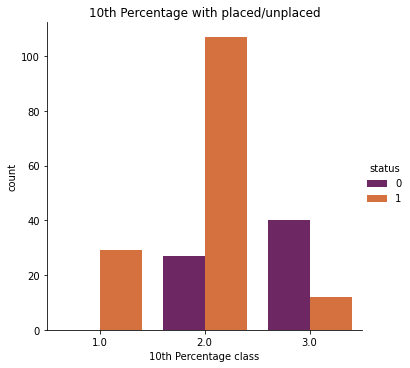

In [117]:
sns.catplot('ssc_p_c',data=df,kind='count',hue='status',palette='inferno')
plt.title('10th Percentage with placed/unplaced')
plt.xlabel('10th Percentage class')

As can be seen, all students scoring 80-100% in 10th grade got placed. Most students in 60-80% range did get placed while maximum students below 60% in 10th standard couldn't get placed. It shows that generally, a student who has done well in 10th grade is more likely to get placed.

Let us study the same for the remaining score percentages such as 12th, UG score, MBA score and E-test score.

Text(0.5, 6.79999999999999, '12th Percentage class')

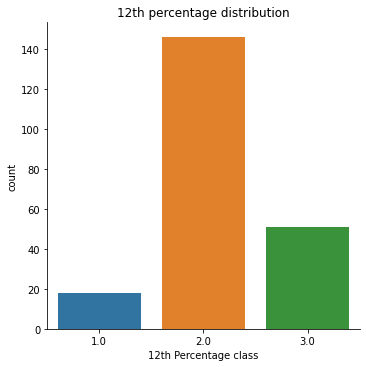

In [119]:
sns.catplot('hsc_p_c',data=df,kind='count')
plt.title('12th percentage distribution')
plt.xlabel('12th Percentage class')

Very few students are in the 80-100 % bracket in 12th board exams. Like 10th grade, most students were in the 60-80 % range, followed by 0-60 % range.

Text(0.5, 21.706249999999983, '12th Percentage class')

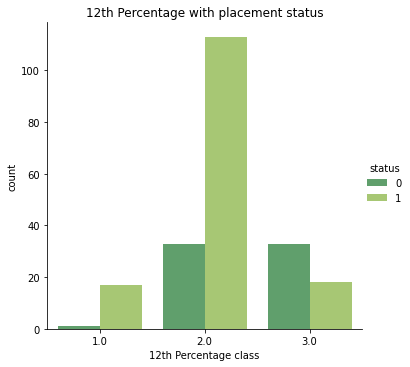

In [120]:
sns.catplot('hsc_p_c',data=df,kind='count',hue='status',palette='summer')
plt.title('12th Percentage with placement status')
plt.xlabel('12th Percentage class')

The graph is quite similar to what was seen for 10th board exams. Almost entire students with 80-100 % got placed. Most students in 60-80 % range also got placed. Just like in the case of 10th boards, most students could not get placed in the 0-60 % range.

Text(0.5, 24.0, 'UG percentage class')

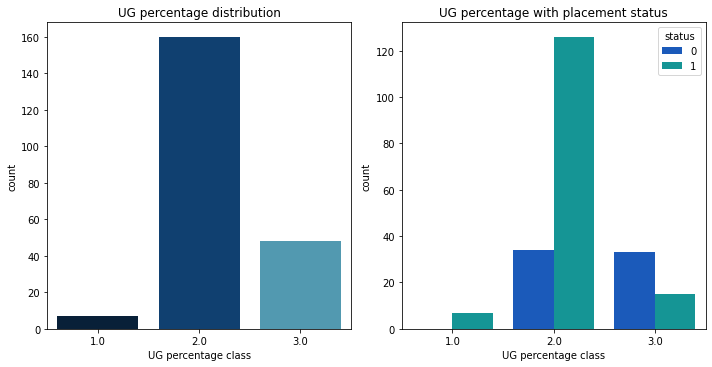

In [122]:
fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)

g = sns.catplot("degree_p_c" ,kind='count', data=df, ax=ax1,palette='ocean')

ax2=fig.add_subplot(122)

g=sns.catplot('degree_p_c',kind='count',data=df,ax=ax2,hue='status',palette='winter')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('UG percentage distribution')
ax1.set_xlabel('UG percentage class')
ax2.set_title('UG percentage with placement status')
ax2.set_xlabel('UG percentage class')

Text(0.5, 24.0, 'MBA percentage class')

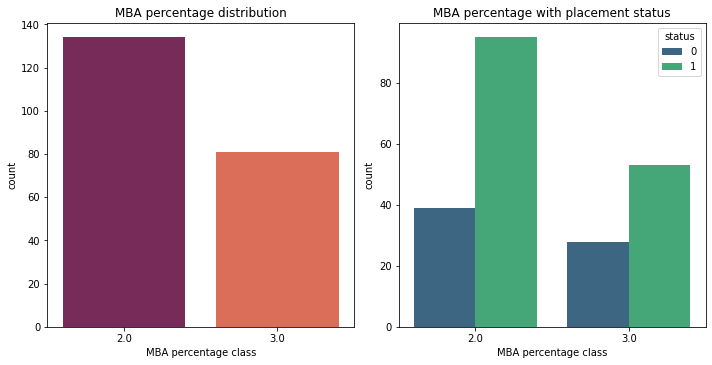

In [123]:
fig1=plt.figure(figsize=(10,5))

ax1 = fig1.add_subplot(121)

g = sns.catplot("mba_p_c" ,kind='count', data=df, ax=ax1,palette='rocket')

ax2=fig1.add_subplot(122)

g=sns.catplot('mba_p_c',kind='count',data=df,ax=ax2,hue='status',palette='viridis')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('MBA percentage distribution')
ax1.set_xlabel('MBA percentage class')
ax2.set_title('MBA percentage with placement status')
ax2.set_xlabel('MBA percentage class')

On studying the MBA percentage data, we can see that no students crossed the 80% threshold. Hence, the data for class 1 is not available for MBA percentage. 

Upon studying the MBA percentage data, we can see that more students from percentage class 2 got placed as opposed to class 3. However, the difference is not as high as for board and UG percentages. Hence, we can say that MBA percentage is not as big as a factor. This could be because MBA is a branch that places much more importance on speaking skills, internships, case studies, etc rather than academic scores. Hence, the play is much more level fielded in this case. 

Text(0.5, 24.0, 'E test precentage class')

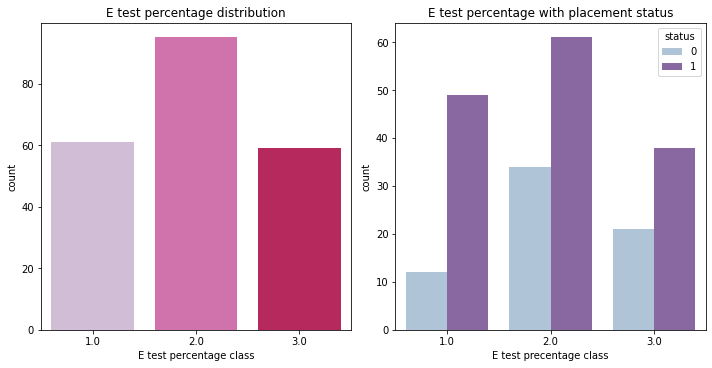

In [124]:
fig2=plt.figure(figsize=(10,5))

ax1 = fig2.add_subplot(121)

g = sns.catplot("etest_p_c" ,kind='count', data=df, ax=ax1,palette='PuRd')

ax2=fig2.add_subplot(122)

g=sns.catplot('etest_p_c',kind='count',data=df,ax=ax2,hue='status',palette='BuPu')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('E test percentage distribution')
ax1.set_xlabel('E test percentage class')
ax2.set_title('E test percentage with placement status')
ax2.set_xlabel('E test precentage class')

The above graphs tell us about how the students have performed in the E-tests and what value of those have converted their offers.

Most students in the class 1 category have successfully received offers from the company. It is also encouraging to see that more students in class 3 categories have also successfully converted offers.

The reason could be because E-tests are just preliminary screening tests. These tests usually don't hold much value once the student passes the test and moves ahead with further screening process that could include group discussions and interviews.


## High school stream and degree specialisations

We are now interested to check if high school stream, UG degree specialisation or MBA degree specialisation has any particular importance with respect to placement status.

Text(0.5, 24.0, 'HS specialisation')

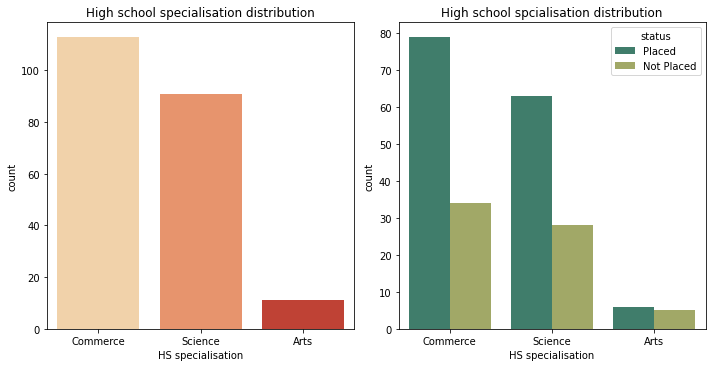

In [127]:
fig3=plt.figure(figsize=(10,5))

ax1 = fig3.add_subplot(121)

g = sns.catplot("hsc_s" ,kind='count', data=df_copy, ax=ax1,palette='OrRd')

ax2=fig3.add_subplot(122)

g=sns.catplot('hsc_s',kind='count',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('High school specialisation distribution')
ax1.set_xlabel('HS specialisation')
ax2.set_title('High school spcialisation distribution')
ax2.set_xlabel('HS specialisation')

As we can see, maximum students enrolled in the program were either from commerce or science background. Very few students were from Arts background.

In terms of placements, it can be seen that most students who got placed were from commerce background followed by science and then arts. This could be because both commerce and arts have great usage of mathematica and analytical skills which are quite important in finance operations. Since commerce students have economics and finance as a part of their school and UG studies, hence they are of high demand by the companies. Arts students will be a bigger asset for Human Resources department of companies as their skillsets are ideal for HR related work. Hence, students getting placed with arts background are demanded mostly for HR related roles.

Text(0.5, 24.0, 'MBA specialisation')

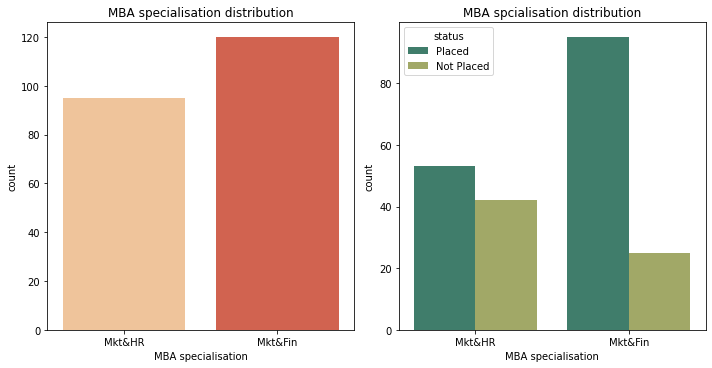

In [129]:
fig4=plt.figure(figsize=(10,5))

ax1 = fig4.add_subplot(121)

g = sns.catplot("specialisation" ,kind='count', data=df_copy, ax=ax1,palette='OrRd')

ax2=fig4.add_subplot(122)

g=sns.catplot('specialisation',kind='count',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('MBA specialisation distribution')
ax1.set_xlabel('MBA specialisation')
ax2.set_title('MBA spcialisation distribution')
ax2.set_xlabel('MBA specialisation')

From the MBA specialisation data, it can be seen most students who were placed were in Marketing & Finance division. In Marketing & HR section, students couldn't convert as many placement opprotunities. Number of placed and unplaced students are about the same in this case.

Text(0.5, 24.0, 'UG specialisation')

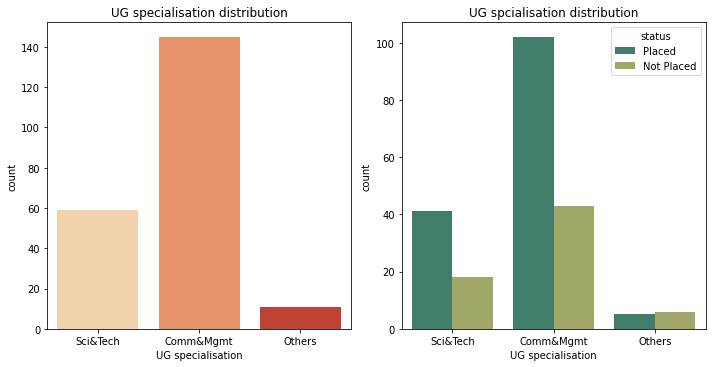

In [130]:
fig5=plt.figure(figsize=(10,5))

ax1 = fig5.add_subplot(121)

g = sns.catplot("degree_t" ,kind='count', data=df_copy, ax=ax1,palette='OrRd')

ax2=fig5.add_subplot(122)

g=sns.catplot('degree_t',kind='count',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('UG specialisation distribution')
ax1.set_xlabel('UG specialisation')
ax2.set_title('UG spcialisation distribution')
ax2.set_xlabel('UG specialisation')

As expected, most of the commerce students were successful in getting placed followed by science and others.

## SSC and HSC board

Let us visualise the data for the boards of candidates who managed to get placed. This will give us an indication if board of examination has any role to play for placements.

Text(0.5, 24.0, 'Students')

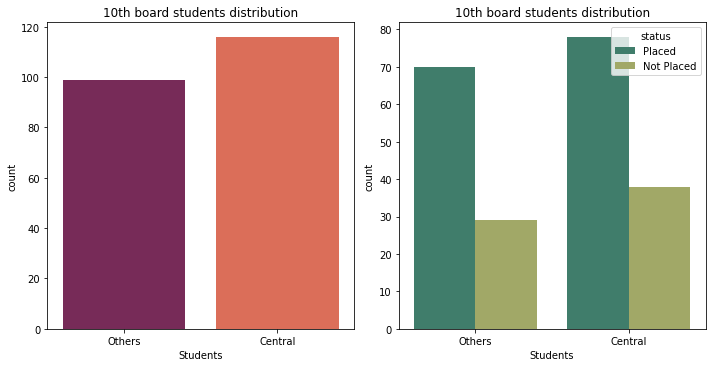

In [131]:
fig6=plt.figure(figsize=(10,5))

ax1 = fig6.add_subplot(121)

g = sns.catplot("ssc_b" ,kind='count', data=df_copy, ax=ax1,palette='rocket')

ax2=fig6.add_subplot(122)

g=sns.catplot('ssc_b',kind='count',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('10th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('10th board students distribution')
ax2.set_xlabel('Students')

The placement ratio for each of the boards is similar. Hence, we could say that 10th board of examination doesn't hold much value towards placement.

Text(0.5, 24.0, 'Students')

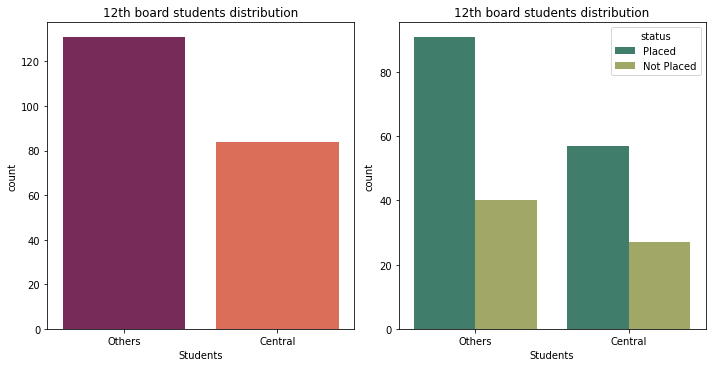

In [132]:
fig7=plt.figure(figsize=(10,5))

ax1 = fig7.add_subplot(121)

g = sns.catplot("hsc_b" ,kind='count', data=df_copy, ax=ax1,palette='rocket')

ax2=fig7.add_subplot(122)

g=sns.catplot('hsc_b',kind='count',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('12th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('12th board students distribution')
ax2.set_xlabel('Students')

Unlike the case for 10th board, more students opted for state boards in their 12th examinations. The performance of state board students was better as more students from state board of 12th were placed. However, the placed/unplaced ratio for both is nearly identical once again. Hence, 12th board is not playing a significant role once again.

## Salary distribution

Let us check how the companies are paying their freshers. We shall find the required median and mean salary of the college placements.

Text(0.5, 1.0, 'Salary distribution for the batch')

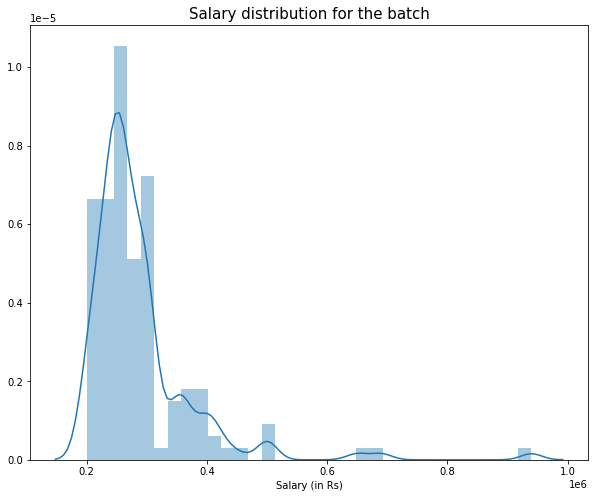

In [147]:
plt.figure(figsize=(10,8))
df_placed=df[df['salary']>0]
sns.distplot(df_placed['salary'])
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)

As we can see, the salary curve is right skewed. This is because there will always be some dream jobs which will offer high packages. However, these packages are very few in number. Majority of the packages will be in the region of 2-4 LPA.

Let us mark the mean and median salaries on the distribution curve to understand what the maximum students are earning.

In [149]:
mean=df_copy['salary'].mean()
median=df_copy['salary'].median()

Text(0.5, 1.0, 'Mean=288655.41   Median=265000.00')

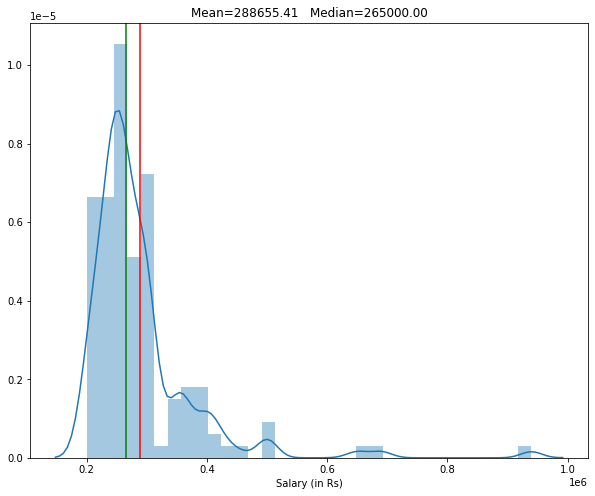

In [155]:
plt.figure(figsize=(10,8))
df_placed=df[df['salary']>0]
sns.distplot(df_placed['salary'])
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)
plt.axvline(mean,color='red')
plt.axvline(median,color='green')
plt.title('Mean={0:.2f}   Median={1:.2f}'.format(mean,median))


The green line shows the median salary of the candidates while the red line shows the mean salary.

## Check for feature correlations

In order to understand how strong are the features correlated to each other, let us create a heatmap of the corrplot that will let us know where the correlations are strong. From the heatmap, we can make strong arguments to remove some of the unimportant features that can be removed for our ML training and testing.

In [156]:
corr=df.corr()

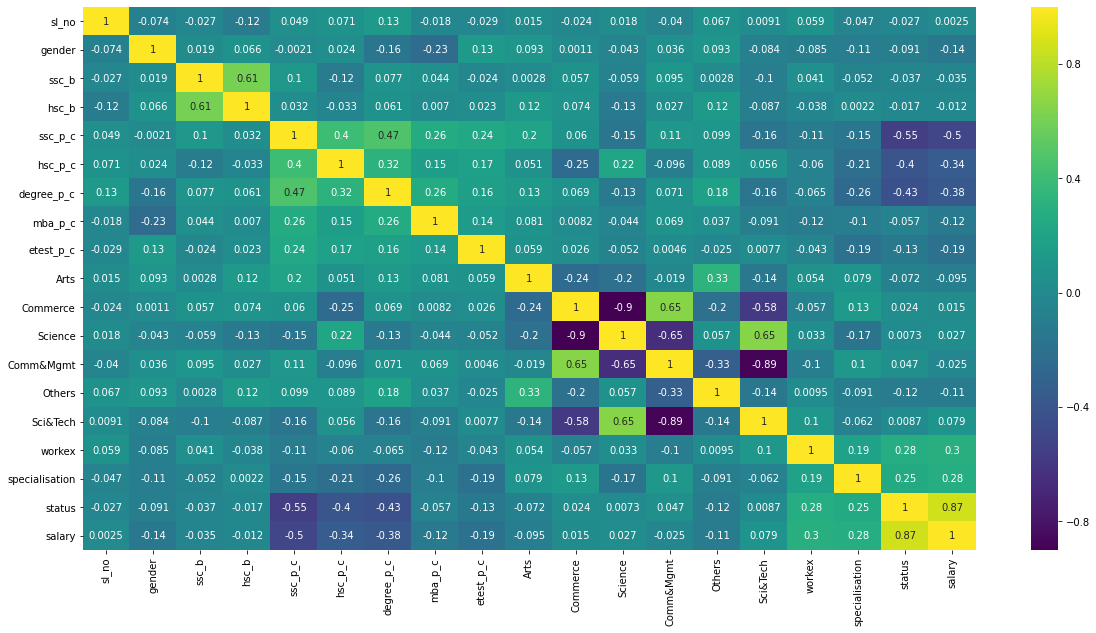

In [163]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='viridis')